<a href="https://colab.research.google.com/github/Hari25483/Computer-Vision/blob/main/Face_identification_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for tensorflow-gpu ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> tensorflow-gpu

note: This is an issue with the package mentioned above, not pip.
hint: See above for outpu

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aeppl                         0.0.33
aesara                        2.7.9
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astropy                       4.3.1
astunparse                    1.6.3
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
backports.zoneinfo            0.2.1
beautifulsoup4                4.6.3
bleach                        6.0.0
blis                          0.7.9
bokeh                         2.4.3
branca                        0.6.0
bs4                           0.0.1
CacheControl                  0.12.11
cach

In [3]:
import tensorflow as tf
import os

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [6]:
# !pip install unrar
!unzip /content/dataset-2.zip

Archive:  /content/dataset-2.zip
   creating: dataset-2/
  inflating: __MACOSX/._dataset-2    
   creating: dataset-2/Dasuni/
  inflating: __MACOSX/dataset-2/._Dasuni  
  inflating: dataset-2/.DS_Store     
  inflating: __MACOSX/dataset-2/._.DS_Store  
   creating: dataset-2/Mahiru/
  inflating: __MACOSX/dataset-2/._Mahiru  
   creating: dataset-2/Divya/
  inflating: __MACOSX/dataset-2/._Divya  
   creating: dataset-2/Thirukkumaran/
  inflating: __MACOSX/dataset-2/._Thirukkumaran  
   creating: dataset-2/Abilash/
  inflating: __MACOSX/dataset-2/._Abilash  
  inflating: dataset-2/Dasuni/IMG-20230303-WA0036.jpg  
  inflating: __MACOSX/dataset-2/Dasuni/._IMG-20230303-WA0036.jpg  
  inflating: dataset-2/Dasuni/IMG-20230306-WA0027.jpg  
  inflating: __MACOSX/dataset-2/Dasuni/._IMG-20230306-WA0027.jpg  
  inflating: dataset-2/Dasuni/IMG-20230306-WA0026.jpg  
  inflating: __MACOSX/dataset-2/Dasuni/._IMG-20230306-WA0026.jpg  
  inflating: dataset-2/Dasuni/IMG-20230303-WA0037.jpg  
  inflating:

In [7]:
import cv2
import imghdr

In [8]:
data_dir = '/content/dataset-2' 

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(data_dir):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image /content/dataset-2/Dasuni/Dasuni
Issue with image /content/dataset-2/Dasuni/Divya
Issue with image /content/dataset-2/Dasuni/Abilash
Issue with image /content/dataset-2/Dasuni/Thirukkumaran
Issue with image /content/dataset-2/Dasuni/.DS_Store
Issue with image /content/dataset-2/Dasuni/Mahiru
Issue with image /content/dataset-2/Divya/Dasuni
Issue with image /content/dataset-2/Divya/Divya
Issue with image /content/dataset-2/Divya/Abilash
Issue with image /content/dataset-2/Divya/Thirukkumaran
Issue with image /content/dataset-2/Divya/.DS_Store
Issue with image /content/dataset-2/Divya/Mahiru
Issue with image /content/dataset-2/Abilash/Dasuni
Issue with image /content/dataset-2/Abilash/Divya
Issue with image /content/dataset-2/Abilash/Abilash
Issue with image /content/dataset-2/Abilash/Thirukkumaran
Issue with image /content/dataset-2/Abilash/.DS_Store
Issue with image /content/dataset-2/Abilash/Mahiru
Issue with image /content/dataset-2/Thirukkumaran/Dasuni
Issue with im

# 3. Load Data

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('/content/dataset-2')

Found 193 files belonging to 5 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

In [16]:
batch[0].shape

(32, 256, 256, 3)

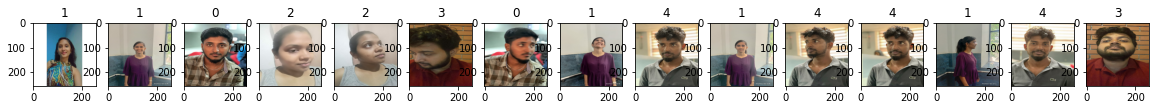

In [17]:
fig, ax = plt.subplots(ncols=15, figsize=(20,20))
for idx, img in enumerate(batch[0][:15]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [18]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [19]:
data.as_numpy_iterator().next()

(array([[[[0.70980394, 0.63529414, 0.5058824 ],
          [0.7058824 , 0.6313726 , 0.5019608 ],
          [0.7019608 , 0.627451  , 0.49803922],
          ...,
          [0.7607843 , 0.64705884, 0.48235294],
          [0.7607843 , 0.64705884, 0.48235294],
          [0.7607843 , 0.64705884, 0.48235294]],
 
         [[0.70980394, 0.63529414, 0.5058824 ],
          [0.7058824 , 0.6313726 , 0.5019608 ],
          [0.7019608 , 0.627451  , 0.49803922],
          ...,
          [0.7607843 , 0.64705884, 0.48235294],
          [0.7607843 , 0.64705884, 0.48235294],
          [0.7607843 , 0.64705884, 0.48235294]],
 
         [[0.7137255 , 0.6392157 , 0.50980395],
          [0.7137255 , 0.6392157 , 0.50980395],
          [0.7137255 , 0.6392157 , 0.50980395],
          ...,
          [0.7647059 , 0.6509804 , 0.4862745 ],
          [0.7647059 , 0.6509804 , 0.4862745 ],
          [0.7647059 , 0.6509804 , 0.4862745 ]],
 
         ...,
 
         [[0.9137255 , 0.9647059 , 0.85490197],
          [0.91372

# 5. Split Data

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [21]:
train_size

4

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [23]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [44]:
hist = model.fit(train, epochs=100, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/100
4/4 [==============================] - 4s 649ms/step - loss: -23861466.0000 - accuracy: 0.2344 - val_loss: -25237520.0000 - val_accuracy: 0.2812
Epoch 2/100
4/4 [==============================] - 3s 475ms/step - loss: -33283108.0000 - accuracy: 0.2344 - val_loss: -31126438.0000 - val_accuracy: 0.2500
Epoch 3/100
4/4 [==============================] - 3s 481ms/step - loss: -42289512.0000 - accuracy: 0.2109 - val_loss: -61264216.0000 - val_accuracy: 0.1875
Epoch 4/100
4/4 [==============================] - 4s 809ms/step - loss: -61262272.0000 - accuracy: 0.2109 - val_loss: -51482448.0000 - val_accuracy: 0.2500
Epoch 5/100
4/4 [==============================] - 3s 470ms/step - loss: -80575696.0000 - accuracy: 0.2109 - val_loss: -86807096.0000 - val_accuracy: 0.2812
Epoch 6/100
4/4 [==============================] - 3s 470ms/step - loss: -96017248.0000 - accuracy: 0.1875 - val_loss: -106672192.0000 - val_accuracy: 0.1250
Epoch 7/100
4/4 [==============================] - 3s 473

# 8. Plot Performance

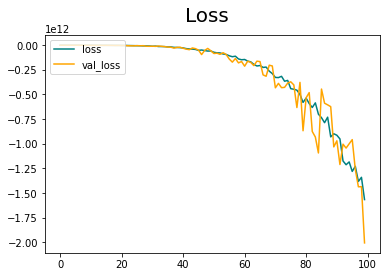

In [45]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

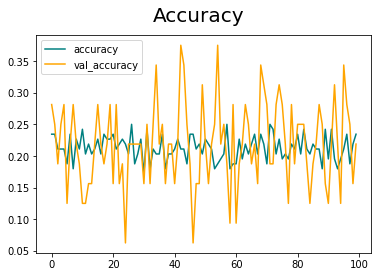

In [46]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [47]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [48]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [49]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [50]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [51]:
import cv2

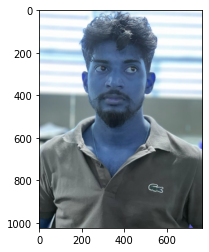

In [52]:
img = cv2.imread('/content/IMG-20230302-WA0078.jpg')
plt.imshow(img)
plt.show()

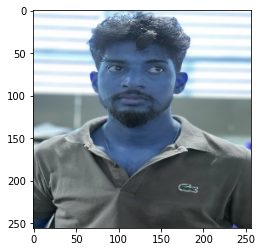

In [53]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [54]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 30ms/step


In [55]:
yhat

array([[1.]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

### New Section